<a href="https://colab.research.google.com/github/yleessam/dl/blob/main/2_3_classifier_breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.2 머신러닝 모델 학습하기

데이터 출처: https://scikit-learn.org/stable/datasets/toy_dataset.html?#breast-cancer-dataset

## 2.2.1 데이터 불러오기

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import seaborn as  sns

import warnings
warnings.filterwarnings('ignore')

# 데이터 불러오기
breast_cancer = load_breast_cancer()
breast_cancer_df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)
breast_cancer_df['label'] = breast_cancer.target
breast_cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [2]:
breast_cancer_df.shape

(569, 31)

In [3]:
breast_cancer_df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'label'],
      dtype='object')

In [4]:
breast_cancer_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [5]:
# 데이터프레임의 요약 정보
breast_cancer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [6]:
#  카테고리 확인
breast_cancer_df['label'].unique()

array([0, 1])

In [7]:
breast_cancer_df['label'].value_counts().sort_index()


0    212
1    357
Name: label, dtype: int64

In [8]:
# 결측치 확인
breast_cancer_df.isnull().sum().sum()

0

In [9]:
# 중복값 여부 확인
breast_cancer_df.duplicated().sum()

0

<Axes: xlabel='label', ylabel='count'>

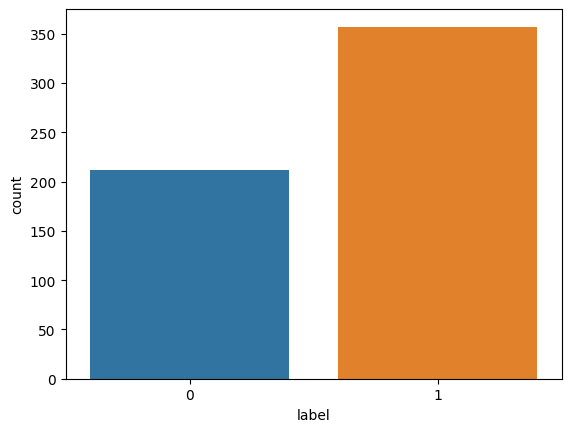

In [10]:
import seaborn as sns
sns.countplot(x='label', data = breast_cancer_df)

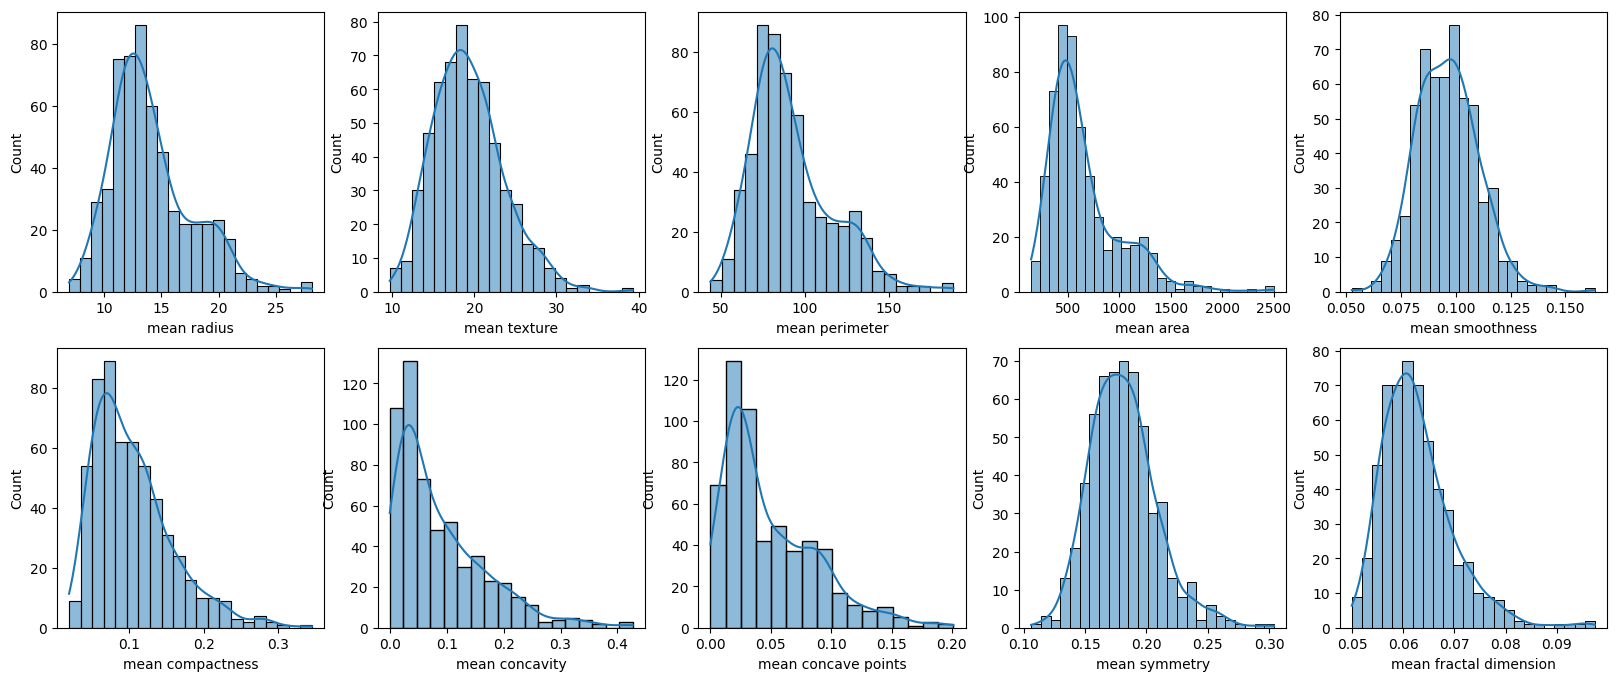

In [11]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 5)
fig.set_size_inches(20,8)

for i in range(2):
    for j in range(5):
        attr = i * 5 + j
        sns.histplot(x = breast_cancer_df.columns[attr], data = breast_cancer_df,
                     kde = True, ax=axs[i][j])

## 2.2.2.데이터 분할

In [12]:
from sklearn.model_selection import train_test_split

# 데이터분할
X = breast_cancer_df.iloc[:, :30]
y = breast_cancer_df['label']

# 학습용 데이터와 테스트용 데이터로 나눔
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [13]:
print("학습용 데이터 구조:{0}, 테스트용 데이터 구조: {1}".
      format(X_train.shape, X_test.shape))

학습용 데이터 구조:(426, 30), 테스트용 데이터 구조: (143, 30)


In [14]:
y_train.value_counts()

1    267
0    159
Name: label, dtype: int64

In [15]:
y_test.value_counts()

1    90
0    53
Name: label, dtype: int64

## 2.2.3.학습-의사결정나무

In [16]:
from sklearn.tree import DecisionTreeClassifier
# DecisionTreeClassifier 객체 생성
model = DecisionTreeClassifier(random_state=42, max_depth = 2)
# 학습용 데이터로 학습 수행
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=42)

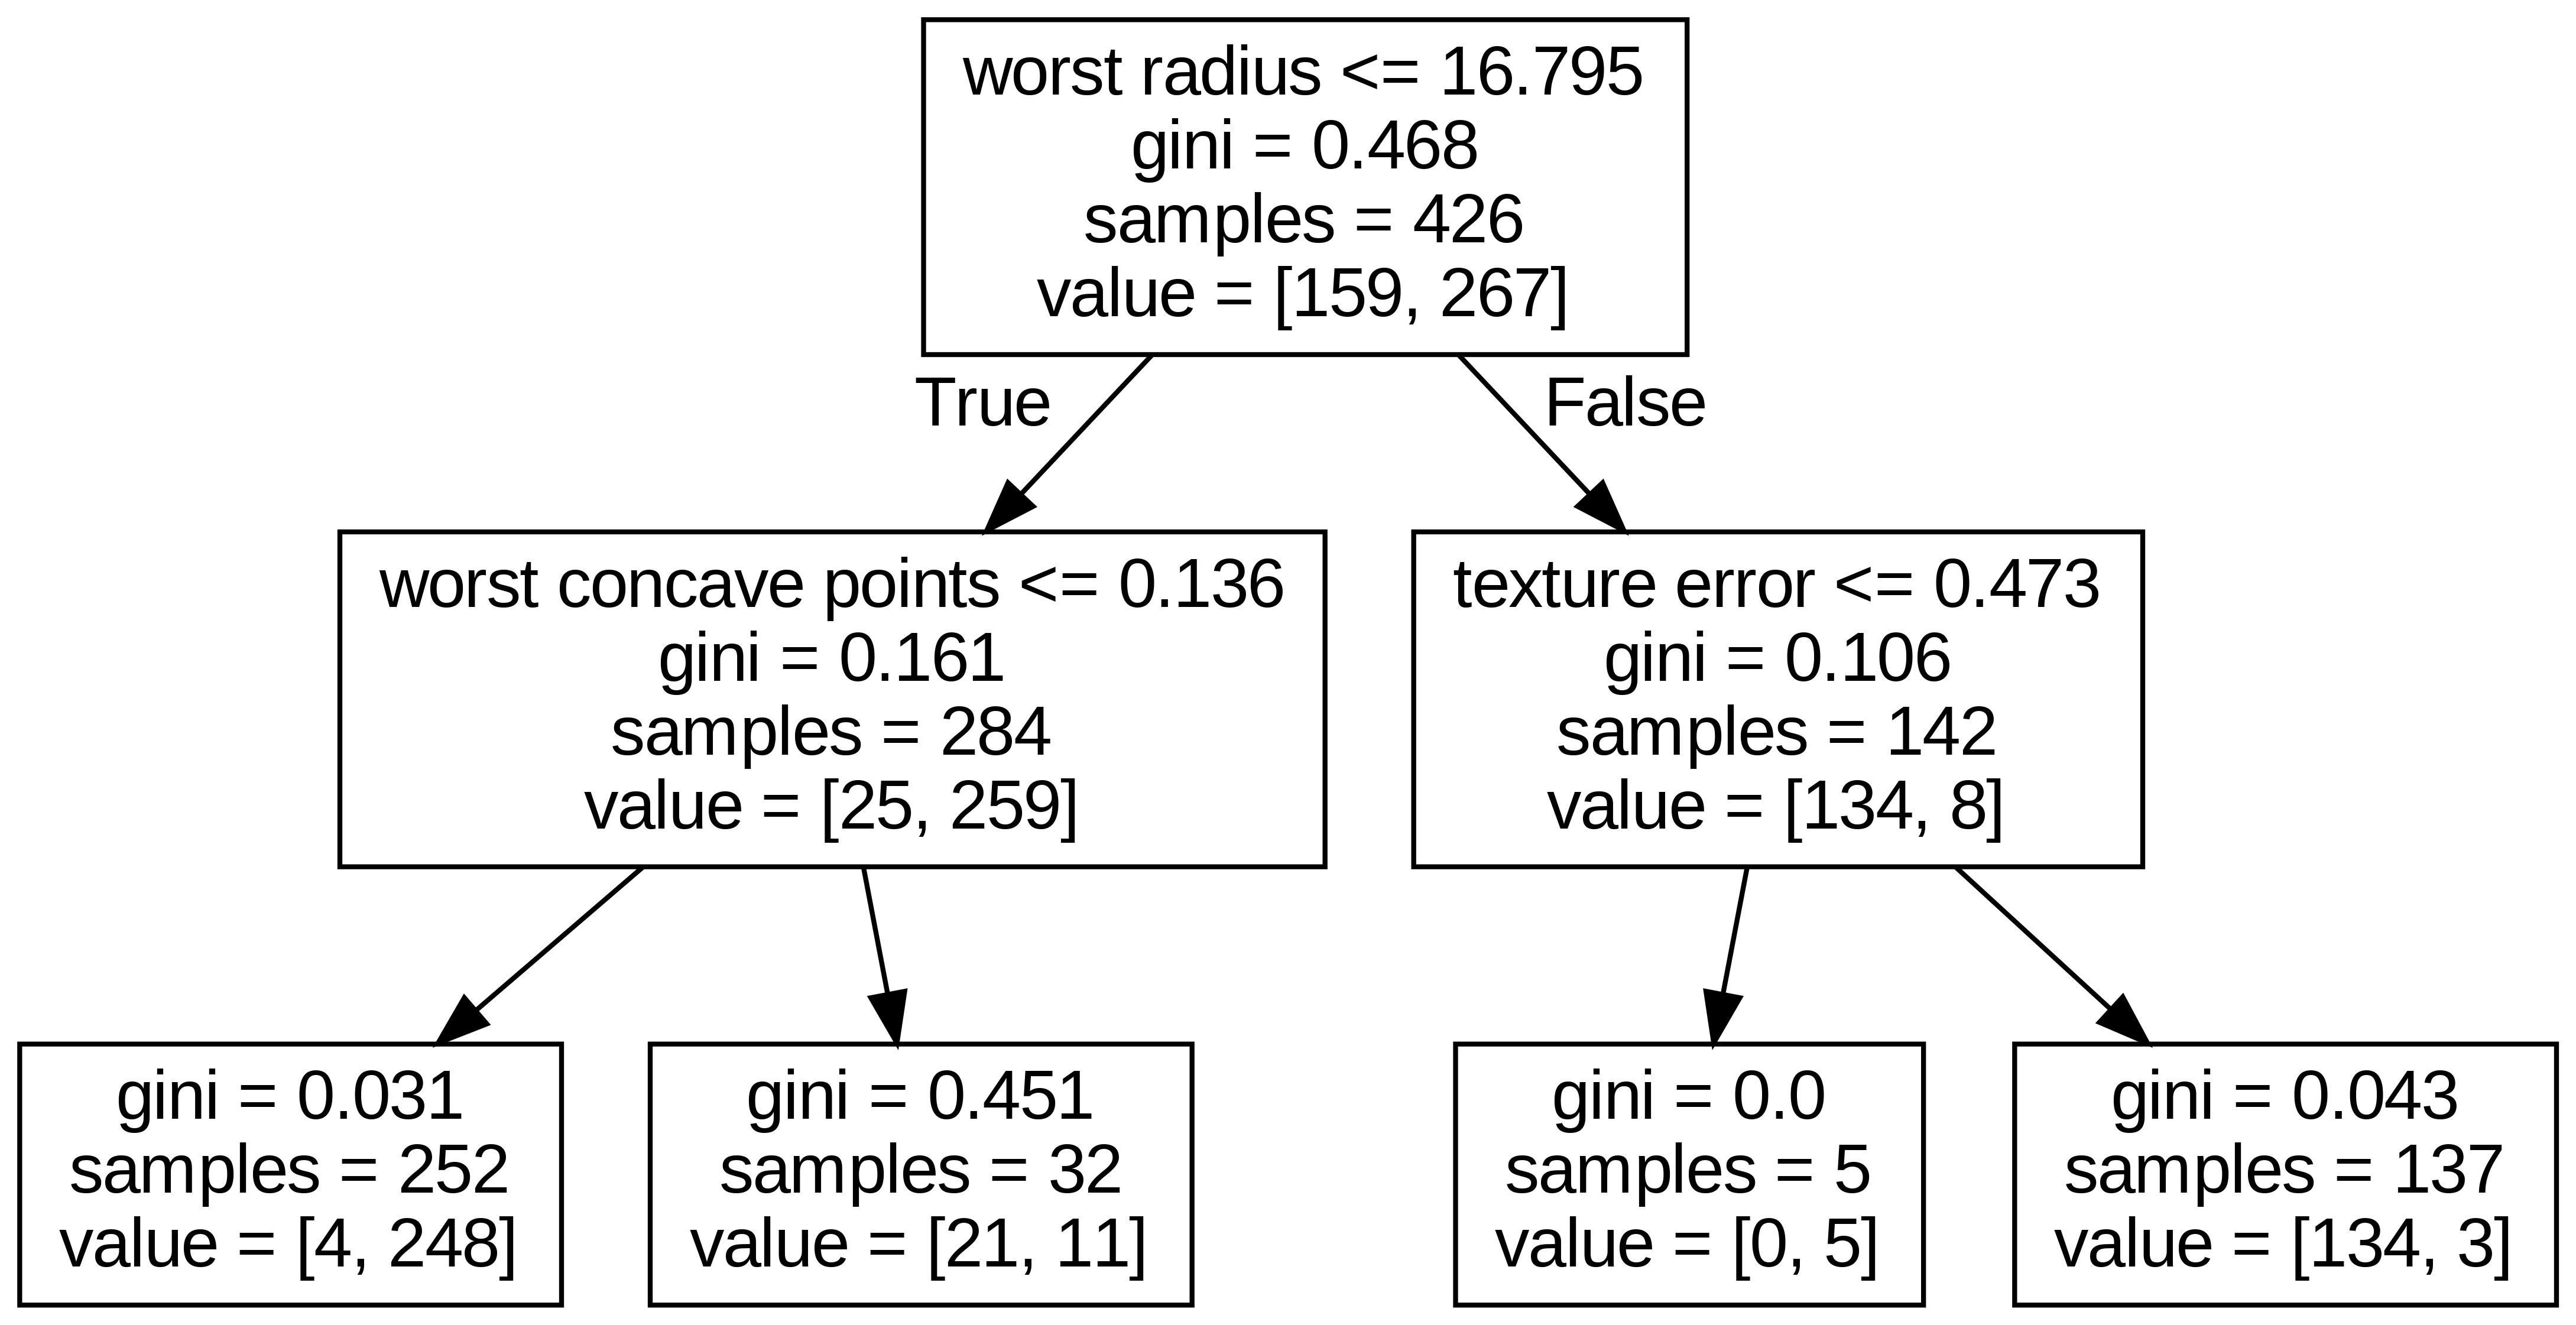

In [17]:
from sklearn.tree import export_graphviz
from subprocess import call
from IPython.display import Image

# 의사결정나무 모델을 dot 파일로 추출
export_graphviz(model, feature_names = X_train.columns, out_file='tree.dot')

# dot 파일을 .png로 변환
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# png 출력
Image(filename = 'tree.png')

## 2.2.4 평가

In [18]:
#테스트용 데이터로 모델 평가
score = model.score(X_test, y_test)
score

0.9090909090909091

## 2.2.5 예측

In [19]:
X_test.iloc[0]

mean radius                 12.750000
mean texture                16.700000
mean perimeter              82.510000
mean area                  493.800000
mean smoothness              0.112500
mean compactness             0.111700
mean concavity               0.038800
mean concave points          0.029950
mean symmetry                0.212000
mean fractal dimension       0.066230
radius error                 0.383400
texture error                1.003000
perimeter error              2.495000
area error                  28.620000
smoothness error             0.007509
compactness error            0.015610
concavity error              0.019770
concave points error         0.009199
symmetry error               0.018050
fractal dimension error      0.003629
worst radius                14.450000
worst texture               21.740000
worst perimeter             93.630000
worst area                 624.100000
worst smoothness             0.147500
worst compactness            0.197900
worst concav

In [20]:
y_pred = model.predict([X_test.iloc[0]])
y_pred

array([1])

In [21]:
y_test.iloc[0]

1

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [23]:
tree_model = DecisionTreeClassifier(random_state=42)
neighbor_model  = KNeighborsClassifier(n_neighbors=5)
svm_model  = SVC(random_state=42)
forest_model  = RandomForestClassifier(n_estimators=300,random_state=42)
logistic_model  = LogisticRegression(random_state=42)
gbm_model  = GradientBoostingClassifier(n_estimators=300,random_state=42)
xgb_model  = XGBClassifier(n_estimators=300,random_state=42)
lgb_model  = LGBMClassifier(n_estimators=300,random_state=42)

model_list = [tree_model,neighbor_model, svm_model,forest_model,
              logistic_model,gbm_model,xgb_model,lgb_model]

In [24]:
for model in model_list:
  model.fit(X_train, y_train)
  score = model.score(X_test, y_test)
  model_name = model.__class__.__name__
  print('{0} 정확도 : {1:.2f}'.format(model_name, score))

DecisionTreeClassifier 정확도 : 0.92
KNeighborsClassifier 정확도 : 0.93
SVC 정확도 : 0.92
RandomForestClassifier 정확도 : 0.96
LogisticRegression 정확도 : 0.96
GradientBoostingClassifier 정확도 : 0.96
XGBClassifier 정확도 : 0.97
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 267, number of negative: 159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000351 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4266
[LightGBM] [Info] Number of data points in the train set: 426, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.626761 -> initscore=0.518344
[LightGBM] [Info] Start training from score 0.518344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

In [25]:
#혼동행렬 출력
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,  f1_score, roc_auc_score

def classifier_evaluation(y_test, y_pred):
  confusion = confusion_matrix(y_test,y_pred)
  accuracy = accuracy_score(y_test,y_pred)
  precision = precision_score(y_test, y_pred)
  recall = recall_score(y_test,y_pred)
  f1 = f1_score(y_test, y_pred)

  print('정확도: {0:.2f}, 정밀도: {1:.2f}, 재현율: {2:.2f}, F1-score: {3:.2f}'.format(accuracy, precision, recall, f1))
  print('혼동행렬', confusion, sep='\n')

In [26]:
model_list = [neighbor_model, svm_model, forest_model, logistic_model, gbm_model, xgb_model, lgb_model]
for model in model_list:
  model.fit(X_train,  y_train)
  y_pred=  model.predict(X_test)
  model_name = model.__class__.__name__

  print('\n{0} 평가지표: '.format(model_name))
  classifier_evaluation(y_test,y_pred)


KNeighborsClassifier 평가지표: 
정확도: 0.93, 정밀도: 0.93, 재현율: 0.96, F1-score: 0.95
혼동행렬
[[47  6]
 [ 4 86]]

SVC 평가지표: 
정확도: 0.92, 정밀도: 0.91, 재현율: 0.98, F1-score: 0.94
혼동행렬
[[44  9]
 [ 2 88]]

RandomForestClassifier 평가지표: 
정확도: 0.96, 정밀도: 0.96, 재현율: 0.98, F1-score: 0.97
혼동행렬
[[49  4]
 [ 2 88]]

LogisticRegression 평가지표: 
정확도: 0.96, 정밀도: 0.95, 재현율: 0.99, F1-score: 0.97
혼동행렬
[[48  5]
 [ 1 89]]

GradientBoostingClassifier 평가지표: 
정확도: 0.96, 정밀도: 0.95, 재현율: 0.99, F1-score: 0.97
혼동행렬
[[48  5]
 [ 1 89]]

XGBClassifier 평가지표: 
정확도: 0.97, 정밀도: 0.96, 재현율: 0.99, F1-score: 0.97
혼동행렬
[[49  4]
 [ 1 89]]
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 267, number of negative: 159
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000245 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4266
[LightGBM] [Info] Number of data points in the train set: 426, number

In [27]:
#GridSerchCV를 이용한 하이퍼파라미터 튜닝
#RandomFores model 개선

from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators':[100],
    'max_depth':[6,8,10,12],
    'min_samples_leaf':[8,12,18],
    'min_samples_split': [8,16,20]
}
#파라미터 탐색
grid_cv = GridSearchCV(forest_model, param_grid = params, cv=2)
#최적 파라미터로 학습
grid_cv.fit(X_train, y_train)

print('최적 조건', grid_cv.best_params_)

print('\n-- 테스트 결과--')
y_pred = model.predict(X_test)
classifier_evaluation(y_test, y_pred)

최적 조건 {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 20, 'n_estimators': 100}

-- 테스트 결과--
정확도: 0.97, 정밀도: 0.96, 재현율: 0.99, F1-score: 0.97
혼동행렬
[[49  4]
 [ 1 89]]
